# TITANIC DATASET



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.rename(columns={'Pclass':'Passengerclass','SibSp':'SiblingsSpouse','Parch':'ParentChild'},inplace=True)
test.rename(columns={'Pclass':'Passengerclass','SibSp':'SiblingsSpouse','Parch':'ParentChild'},inplace=True)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Passengerclass  891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SiblingsSpouse  891 non-null    int64  
 7   ParentChild     891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Passengerclass,Age,SiblingsSpouse,ParentChild,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#checking for duplicate data
titanic['Name'].duplicated().value_counts()

Name
False    891
Name: count, dtype: int64

In [8]:
titanic.isnull().any()

PassengerId       False
Survived          False
Passengerclass    False
Name              False
Sex               False
Age                True
SiblingsSpouse    False
ParentChild       False
Ticket            False
Fare              False
Cabin              True
Embarked           True
dtype: bool

In [9]:
titanic.isnull().sum()

PassengerId         0
Survived            0
Passengerclass      0
Name                0
Sex                 0
Age               177
SiblingsSpouse      0
ParentChild         0
Ticket              0
Fare                0
Cabin             687
Embarked            2
dtype: int64

<Axes: >

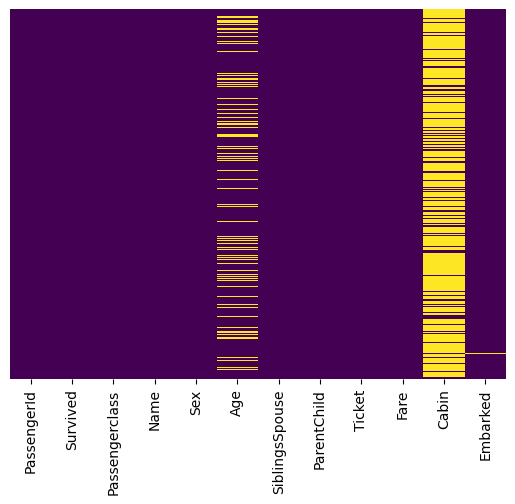

In [10]:
#displaying the null values on a heatmap
#cabin has a concecutive number of null values
#Age is incosistent so can be fixed 
sns.heatmap(data=titanic.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [11]:
titanic['Age'].nunique()

88

<Axes: xlabel='Passengerclass', ylabel='Age'>

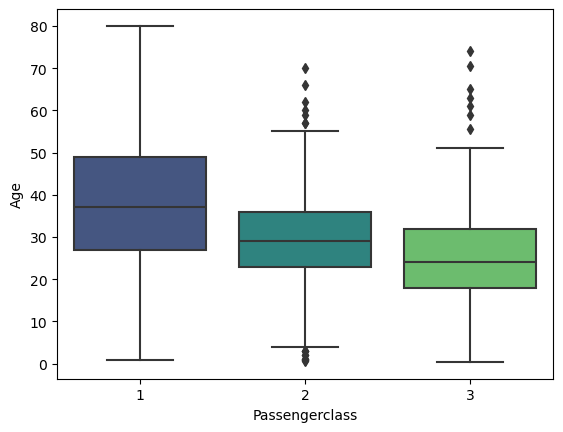

In [12]:
sns.boxplot(data=titanic, x='Passengerclass',y='Age',palette='viridis')
#using the Pclass to determine the mean average age in a particular class

In [13]:
#filling the missing values in the age column for the training and test data
def fill_age(cols):
    Age=cols.iloc[0]
    Passengerclass=cols.iloc[1]

    if pd.isnull(Age)==True:
        if Passengerclass==1:
            return 37
        elif Passengerclass==2:
            return 29
        else:
            return 24
    else:
        return Age

titanic['Age']=titanic[['Age','Passengerclass']].apply(fill_age,axis=1)
titanic['Age']=titanic['Age'].apply(np.int64)

test['Age']=titanic[['Age','Passengerclass']].apply(fill_age,axis=1)
test['Age']=titanic['Age'].apply(np.int64)

In [14]:
titanic['Cabin'].isnull().sum()
titanic.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [15]:
#dropping the row containing the emabarked null values since they are only 2 null values
titanic[titanic['Embarked'].isna()==1]
titanic.drop([61,829],axis=0,inplace=True)

In [16]:
test.isna().sum()

PassengerId       0
Passengerclass    0
Name              0
Sex               0
Age               0
SiblingsSpouse    0
ParentChild       0
Ticket            0
Fare              1
Embarked          0
dtype: int64

In [17]:
test[test['Fare'].isna()==1]

,PassengerId,Passengerclass,Name,Sex,Age,SiblingsSpouse,ParentChild,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,55,0,0,3701,NaN,S


In [18]:
#Using the following variables(Passengerclass,ParentChild,Sex) to find the average fare for both Sex
print('Male AVG:',titanic[(titanic['Passengerclass']==3)&(titanic['ParentChild']==0)&(titanic['Sex']=='male')]['Fare'].mean())
print('Female AVG:',titanic[(titanic['Passengerclass']==3)&(titanic['ParentChild']==0)&(titanic['Sex']=='female')]['Fare'].mean())

Male AVG: 9.970505743243242
Female AVG: 10.207651764705883


In [19]:
avg=titanic[(titanic['Passengerclass']==3)&(titanic['ParentChild']==0)&(titanic['Sex']=='male')]['Fare'].mean()

In [20]:
#Filling the missing value in Fare with the mean 
test.fillna(value=avg,inplace=True)

## Detecting Outliers

C:\Users\markanthony\AppData\Local\Temp\ipykernel_24220\1545264537.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age']);
c:\Users\markanthony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


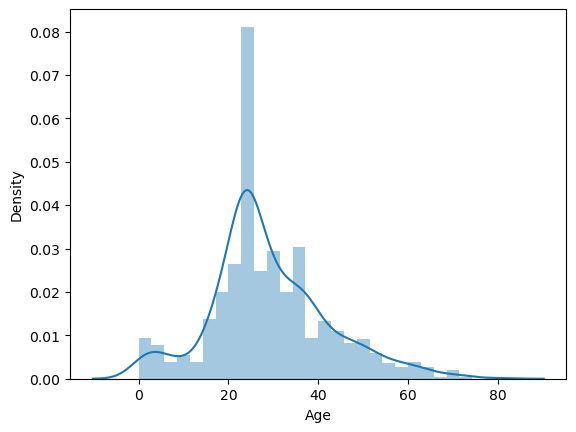

In [21]:
sns.distplot(titanic['Age']);

Text(0.5, 0, 'Age')

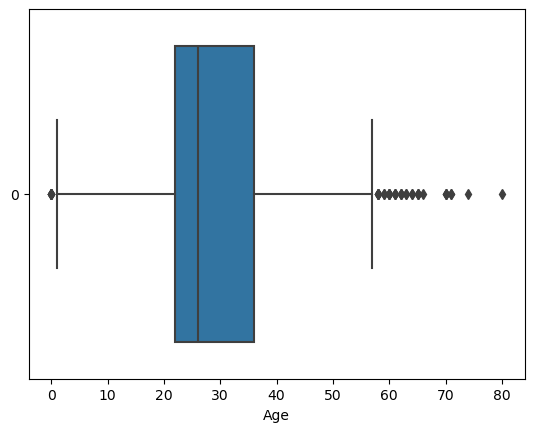

In [22]:
sns.boxplot(titanic['Age'],orient='h')
plt.xlabel('Age')

In [23]:
#finding the limits
upper_limit=titanic['Age'].mean() + 3*titanic['Age'].std()
lower_limit=titanic['Age'].mean() - 3*titanic['Age'].std()

print('upper limit:',upper_limit,'\n'
      'lower limit:',lower_limit)

upper limit: 68.65681286119239 
lower limit: -10.650063704836938


In [24]:
titanic.loc[(titanic['Age'] > upper_limit) | (titanic['Age']<lower_limit)]

,PassengerId,Survived,Passengerclass,Name,Sex,Age,SiblingsSpouse,ParentChild,Ticket,Fare,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70,0,0,C.A. 24580,10.5000,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70,1,1,WE/P 5735,71.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.7750,S


In [25]:
#trimming - delete the outlier data
new_titanic= titanic.loc[(titanic['Age'] < upper_limit) & (titanic['Age'] > lower_limit)]

print('Before removing outliers:',len(titanic),'\n'
      'After removing outliers:',len(new_titanic),'\n'
      'Outliers:',len(titanic)-len(new_titanic))
#changing the titanic dataset
titanic=new_titanic

Before removing outliers: 889 
After removing outliers: 882 
Outliers: 7


Text(0.5, 0, 'Age')

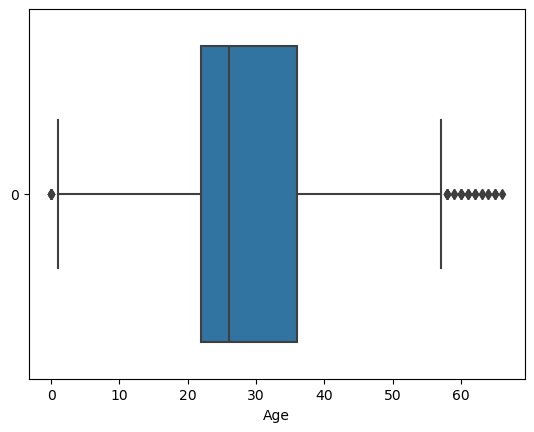

In [26]:
sns.boxplot(new_titanic['Age'],orient='h')
plt.xlabel('Age')

In [27]:
#capping
new_tit=titanic.copy()
new_tit.loc[new_tit['Age']>upper_limit,'Age']=upper_limit;
new_tit.loc[new_tit['Age']<lower_limit,'Age']=lower_limit;
print('Before removing outliers:',len(titanic),'\n'
      'After removing outliers:',len(new_tit))

Before removing outliers: 882 
After removing outliers: 882


C:\Users\markanthony\AppData\Local\Temp\ipykernel_24220\1131879142.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '68.65681286119239' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_tit.loc[new_tit['Age']>upper_limit,'Age']=upper_limit;


<Axes: >

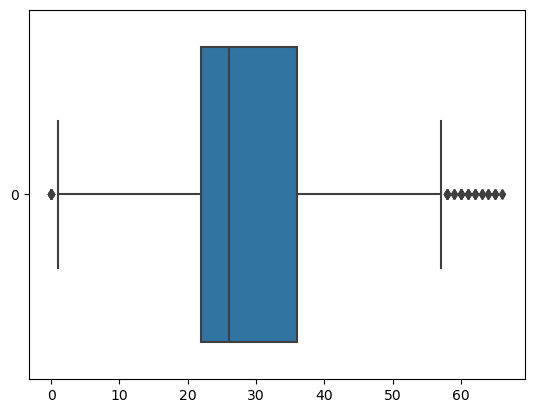

In [28]:
sns.boxplot(new_tit['Age'],orient='h')

In [29]:
titanic.columns

Index(['PassengerId', 'Survived', 'Passengerclass', 'Name', 'Sex', 'Age',
       'SiblingsSpouse', 'ParentChild', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [30]:
#checking the correlation between the variables
titan=titanic[['Survived','Passengerclass','Age', 'SiblingsSpouse',
       'ParentChild','Fare',]]
titan.corr()

,Survived,Passengerclass,Age,SiblingsSpouse,ParentChild,Fare
Survived,1.000000,-0.339572,-0.042584,-0.035229,0.082737,0.256120
Passengerclass,-0.339572,1.000000,-0.406992,0.081157,0.016454,-0.549419
Age,-0.042584,-0.406992,1.000000,-0.244327,-0.170015,0.127899
SiblingsSpouse,-0.035229,0.081157,-0.244327,1.000000,0.413454,0.160209
ParentChild,0.082737,0.016454,-0.170015,0.413454,1.000000,0.216702
Fare,0.256120,-0.549419,0.127899,0.160209,0.216702,1.000000


# Exploratory Data Analysis

<Axes: xlabel='Passengerclass', ylabel='count'>

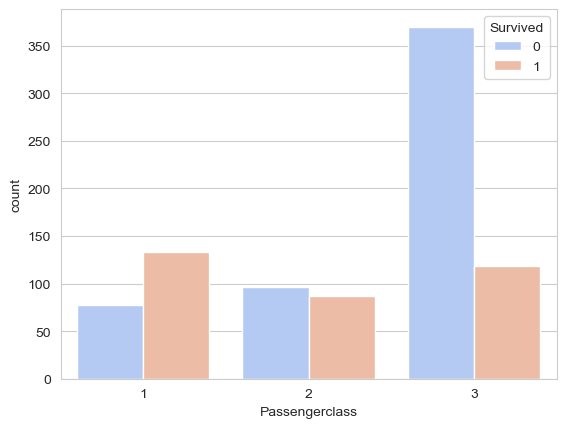

In [31]:
sns.set_style('whitegrid')
sns.countplot(data=titanic,x='Passengerclass',hue='Survived',palette='coolwarm')

<Axes: xlabel='Survived', ylabel='count'>

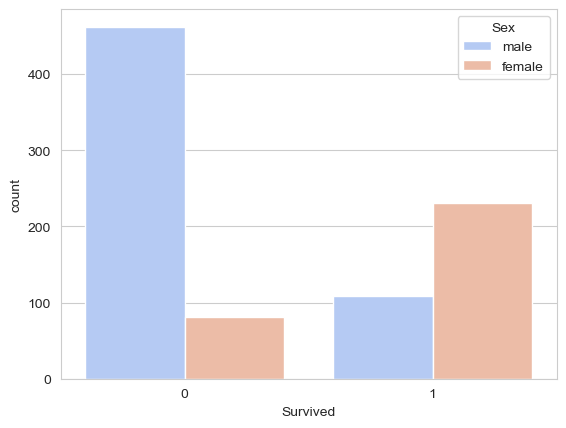

In [32]:
sns.countplot(data=titanic,x='Survived',palette='coolwarm',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

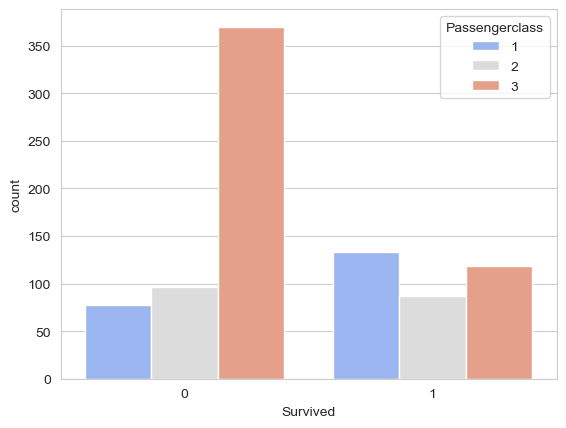

In [33]:
sns.countplot(data=titanic,x='Survived',hue='Passengerclass',palette='coolwarm')

<Axes: xlabel='SiblingsSpouse', ylabel='count'>

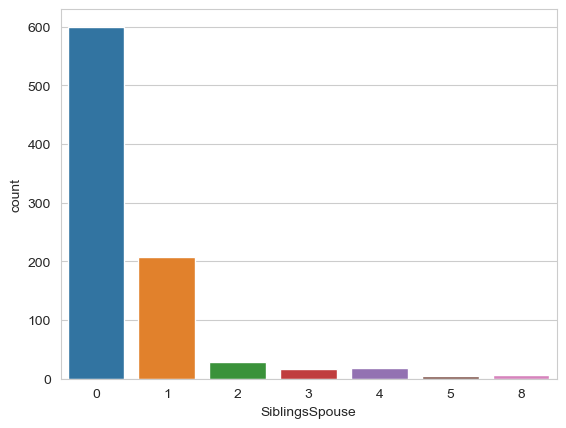

In [34]:
sns.countplot(data=titanic,x='SiblingsSpouse')

C:\Users\markanthony\AppData\Local\Temp\ipykernel_24220\539828806.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'],kde=False,color='red',bins=40);


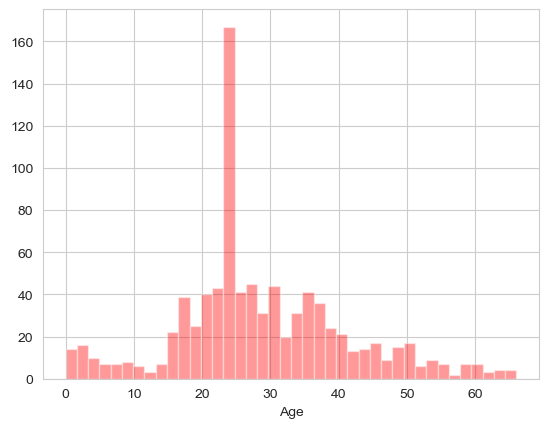

In [35]:
sns.distplot(titanic['Age'],kde=False,color='red',bins=40);

In [36]:
titanic['Age'].value_counts().head(5)

Age
24    167
37     36
29     31
22     27
30     27
Name: count, dtype: int64

### Converting Categorical Features

In [37]:
#creating dummy variables in both test and train data 
embark=pd.get_dummies(titanic['Embarked'],drop_first=True,dtype=int)
sex=pd.get_dummies(titanic['Sex'],drop_first=True,dtype=int)

embark_t=pd.get_dummies(test['Embarked'],drop_first=True,dtype=int)
sex_t=pd.get_dummies(test['Sex'],drop_first=True,dtype=int)

In [38]:
#Drop columns that are not required in test and train data
titanic.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [39]:
titanic_train=pd.concat([titanic,sex,embark],axis=1)
test=pd.concat([test,sex_t,embark_t],axis=1)

In [40]:
titanic_train

,Survived,Passengerclass,Age,SiblingsSpouse,ParentChild,Fare,male,Q,S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1,0,1
887,1,1,19,0,0,30.0000,0,0,1
888,0,3,24,1,2,23.4500,0,0,1
889,1,1,26,0,0,30.0000,1,0,0


In [41]:
test.isna().sum()

Passengerclass    0
Age               0
SiblingsSpouse    0
ParentChild       0
Fare              0
male              0
Q                 0
S                 0
dtype: int64

### TRAINING DATA

In [42]:
titanic_train.columns

Index(['Survived', 'Passengerclass', 'Age', 'SiblingsSpouse', 'ParentChild',
       'Fare', 'male', 'Q', 'S'],
      dtype='object')

In [43]:
test.columns

Index(['Passengerclass', 'Age', 'SiblingsSpouse', 'ParentChild', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [44]:
x_train=titanic_train[['Passengerclass', 'Age', 'SiblingsSpouse', 'ParentChild','Fare', 'male', 'Q', 'S']]
y_train=titanic_train['Survived']

### Training The Model

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lg=LogisticRegression(max_iter=1000)

In [47]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

### Predicting Test Data

In [48]:
prediction=lg.predict(test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
y_test=pd.read_csv('gender_submission.csv')
y_test.drop('PassengerId',axis=1,inplace=True)

In [51]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       266
           1       0.73      0.82      0.77       152

    accuracy                           0.83       418
   macro avg       0.81      0.82      0.82       418
weighted avg       0.83      0.83      0.83       418



In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [53]:
confusion_matrix(y_test,prediction)

array([[221,  45],
       [ 28, 124]], dtype=int64)

In [54]:
accuracy=accuracy_score(y_test,prediction)
print('Accuracy:',accuracy)

Accuracy: 0.8253588516746412
